In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from mpl_toolkits.mplot3d import Axes3D  # Pour la visualisation 3D

SMALL_SIZE = 5
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

# PARTIE 1 : Prétraiter les données

## Importer les données

In [2]:
!pip3 install -U ucimlrepo 

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cardiotocography = fetch_ucirepo(id=193) 
  
# data (as pandas dataframes) 
X = cardiotocography.data.features 
y = cardiotocography.data.targets 
  
# metadata 
print(cardiotocography.metadata) 
  
# variable information 
print(cardiotocography.variables) 


{'uci_id': 193, 'name': 'Cardiotocography', 'repository_url': 'https://archive.ics.uci.edu/dataset/193/cardiotocography', 'data_url': 'https://archive.ics.uci.edu/static/public/193/data.csv', 'abstract': 'The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2126, 'num_features': 21, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['CLASS', 'NSP'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2000, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C51S4N', 'creators': ['D. Campos', 'J. Bernardes'], 'intro_paper': None, 'additional_info': {'summary': '2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified

In [4]:
X

LB     AC     FM     UC     DL   DS   DP  ASTV  MSTV  ALTV  ...  Width  \
0     120  0.000  0.000  0.000  0.000  0.0  0.0    73   0.5    43  ...     64   
1     132  0.006  0.000  0.006  0.003  0.0  0.0    17   2.1     0  ...    130   
2     133  0.003  0.000  0.008  0.003  0.0  0.0    16   2.1     0  ...    130   
3     134  0.003  0.000  0.008  0.003  0.0  0.0    16   2.4     0  ...    117   
4     132  0.007  0.000  0.008  0.000  0.0  0.0    16   2.4     0  ...    117   
...   ...    ...    ...    ...    ...  ...  ...   ...   ...   ...  ...    ...   
2121  140  0.000  0.000  0.007  0.000  0.0  0.0    79   0.2    25  ...     40   
2122  140  0.001  0.000  0.007  0.000  0.0  0.0    78   0.4    22  ...     66   
2123  140  0.001  0.000  0.007  0.000  0.0  0.0    79   0.4    20  ...     67   
2124  140  0.001  0.000  0.006  0.000  0.0  0.0    78   0.4    27  ...     66   
2125  142  0.002  0.002  0.008  0.000  0.0  0.0    74   0.4    36  ...     42   

      Min  Max  Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  
0      62  126     2       0   120   137     121        73         1  
1      68  198     6       1   141   136     140        12         0  
2      68  198     5       1   141   135     138        13         0  
3      53  170    11       0   137   134     137        13         1  
4      53  170     9       0   137   136     138        11         1  
...   ...  ...   ...     ...   ...   ...     ...       ...       ...  
2121  137  177     4       0   153   150     152         2         0  
2122  103  169     6       0   152   148     151         3         1  
2123  103  170     5       0   153   148     152         4         1  
2124  103  169     6       0   152   147     151         4         1  
2125  117  159     2       1   145   143     145         1         0  

[2126 rows x 21 columns]

In [5]:
X.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     0.003178     0.009481     0.004366     0.001889   
std       9.840844     0.003866     0.046666     0.002946     0.002960   
min     106.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.002000     0.000000   
50%     133.000000     0.002000     0.000000     0.004000     0.000000   
75%     140.000000     0.006000     0.003000     0.007000     0.003000   
max     160.000000     0.019000     0.481000     0.015000     0.015000   

                DS           DP         ASTV         MSTV        ALTV  ...  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.00000  ...   
mean      0.000003     0.000159    46.990122     1.332785     9.84666  ...   
std       0.000057     0.000590    17.192814     0.883241    18.39688  ...   
min       0.000000     0.000000    12.000000     0.200000     0.00000  ...   
25%       0.000000     0.000000    32.000000     0.700000     0.00000  ...   
50%       0.000000     0.000000    49.000000     1.200000     0.00000  ...   
75%       0.000000     0.000000    61.000000     1.700000    11.00000  ...   
max       0.001000     0.005000    87.000000     7.000000    91.00000  ...   

             Width          Min          Max         Nmax       Nzeros  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean     70.445908    93.579492   164.025400     4.068203     0.323612   
std      38.955693    29.560212    17.944183     2.949386     0.706059   
min       3.000000    50.000000   122.000000     0.000000     0.000000   
25%      37.000000    67.000000   152.000000     2.000000     0.000000   
50%      67.500000    93.000000   162.000000     3.000000     0.000000   
75%     100.000000   120.000000   174.000000     6.000000     0.000000   
max     180.000000   159.000000   238.000000    18.000000    10.000000   

              Mode         Mean       Median     Variance     Tendency  
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  
mean    137.452023   134.610536   138.090310    18.808090     0.320320  
std      16.381289    15.593596    14.466589    28.977636     0.610829  
min      60.000000    73.000000    77.000000     0.000000    -1.000000  
25%     129.000000   125.000000   129.000000     2.000000     0.000000  
50%     139.000000   136.000000   139.000000     7.000000     0.000000  
75%     148.000000   145.000000   148.000000    24.000000     1.000000  
max     187.000000   182.000000   186.000000   269.000000     1.000000  

[8 rows x 21 columns]

In [6]:
y

CLASS  NSP
0         9    2
1         6    1
2         6    1
3         6    1
4         2    1
...     ...  ...
2121      5    2
2122      5    2
2123      5    2
2124      5    2
2125      1    1

[2126 rows x 2 columns]

In [7]:
y['CLASS'] = y['CLASS'] - 1 
#we did minus one for classes because it is from 1 to 10, and we will have wrong sum if the class equals to 10

/var/folders/jy/y0zy4v9d7xj8kb3z24_tdbmw0000gn/T/ipykernel_47479/879250543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['CLASS'] = y['CLASS'] - 1


In [8]:
y['sum'] = y['NSP']*10 + y['CLASS']
y

/var/folders/jy/y0zy4v9d7xj8kb3z24_tdbmw0000gn/T/ipykernel_47479/409952503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['sum'] = y['NSP']*10 + y['CLASS']


CLASS  NSP  sum
0         8    2   28
1         5    1   15
2         5    1   15
3         5    1   15
4         1    1   11
...     ...  ...  ...
2121      4    2   24
2122      4    2   24
2123      4    2   24
2124      4    2   24
2125      0    1   10

[2126 rows x 3 columns]

In [9]:
y['status'] = np.where(y['NSP'] == 1, 1, -1)  # recodes normal to -1 and everything else to 1
y

/var/folders/jy/y0zy4v9d7xj8kb3z24_tdbmw0000gn/T/ipykernel_47479/1942198689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['status'] = np.where(y['NSP'] == 1, 1, -1)  # recodes normal to -1 and everything else to 1


CLASS  NSP  sum  status
0         8    2   28      -1
1         5    1   15       1
2         5    1   15       1
3         5    1   15       1
4         1    1   11       1
...     ...  ...  ...     ...
2121      4    2   24      -1
2122      4    2   24      -1
2123      4    2   24      -1
2124      4    2   24      -1
2125      0    1   10       1

[2126 rows x 4 columns]

## Visualiser les données

### Pour CLASS

In [10]:
# for the CLASS
distinct_values = y['CLASS'].unique()  
num_distinct_values = y['CLASS'].nunique()  

# Display the results
print("Distinct values in CLASS column:", distinct_values)
print("Number of distinct values:", num_distinct_values)

Distinct values in CLASS column: [8 5 1 7 9 6 0 2 4 3]
Number of distinct values: 10


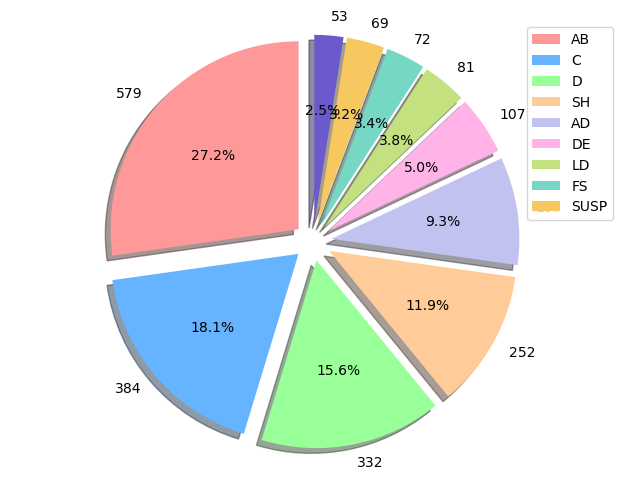

In [11]:
# Display the distribution of the data
value = np.array(y['CLASS'].value_counts())
label = ["A"
"B",
"C",
"D",
"SH",
"AD",
"DE",
"LD",
"FS",
"SUSP"]
sizes = np.array(y['CLASS'].value_counts())
explode = (0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', 
          '#c4e17f', '#76D7C4', '#f6c85f', '#6A5ACD']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

### Pour NSP

In [12]:
#for NSP
distinct_values = y['NSP'].unique()  
num_distinct_values = y['NSP'].nunique()  

# Display the results
print("Distinct values in NSP column:", distinct_values)
print("Number of distinct values:", num_distinct_values)


Distinct values in NSP column: [2 1 3]
Number of distinct values: 3


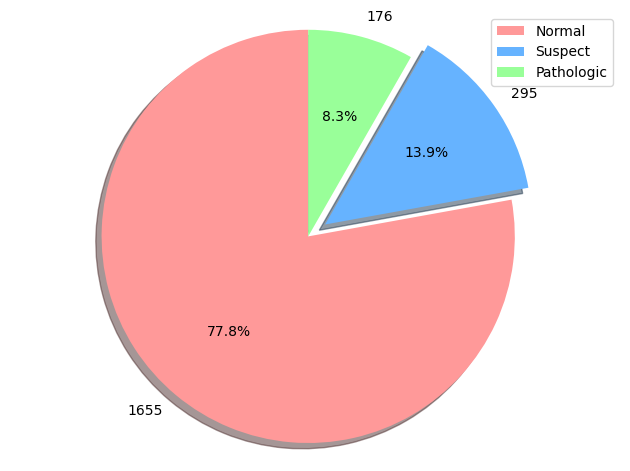

In [13]:
# Display the distribution of the data
value = np.array(y['NSP'].value_counts())
label = ["Normal", "Suspect", "Pathologic"]
sizes = np.array(y['NSP'].value_counts())
explode = (0, 0.1, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

### Pour SUM

In [14]:
#for Sum
distinct_values = y['sum'].unique()  
num_distinct_values = y['sum'].nunique()  

# Display the results
print("Distinct values in sum column:", distinct_values)
print("Number of distinct values:", num_distinct_values)

## Note: la combinaison des valeur de NSP et CLASS donnes 16 valeur distinct

Distinct values in sum column: [28 15 11 37 38 29 26 16 10 12 14 13 24 20 39 25]
Number of distinct values: 16


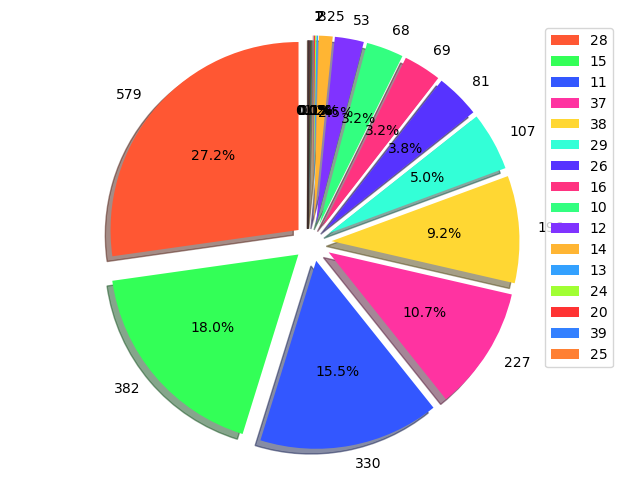

In [15]:
value = np.array(y['sum'].value_counts())
label = [28, 15, 11, 37, 38, 29, 26, 16, 10, 12, 14, 13, 24, 20, 39, 25]
sizes = np.array(y['sum'].value_counts())
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 
           0.1, 0.1, 0.1, 0.1, 0.1, 
           0.1, 0.1, 0.1, 0.1, 0.1, 
           0.1)
colors = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33A1', 
    '#FFD733', '#33FFD7', '#5733FF', '#FF3380', 
    '#33FF80', '#8033FF', '#FFB533', '#33A1FF', 
    '#A1FF33', '#FF3333', '#3380FF', '#FF8033'
]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

### Pour STATUS

In [16]:
distinct_values = y['status'].unique()  
num_distinct_values = y['status'].nunique()  

# Display the results
print("Distinct values in status column:", distinct_values)
print("Number of distinct values:", num_distinct_values)

## Note: la combinaison des valeur de NSP et CLASS donnes 16 valeur distinct

Distinct values in status column: [-1  1]
Number of distinct values: 2


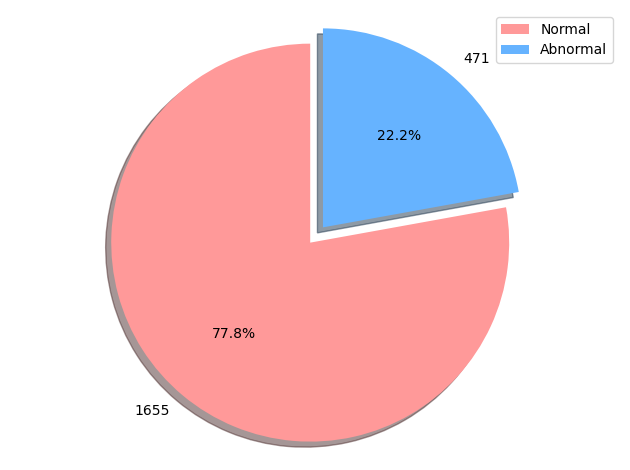

In [17]:
# Display the distribution of the data
value = np.array(y['status'].value_counts())
label = ["Normal", "Abnormal"]
sizes = np.array(y['status'].value_counts())
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

## La matrice de corrélation

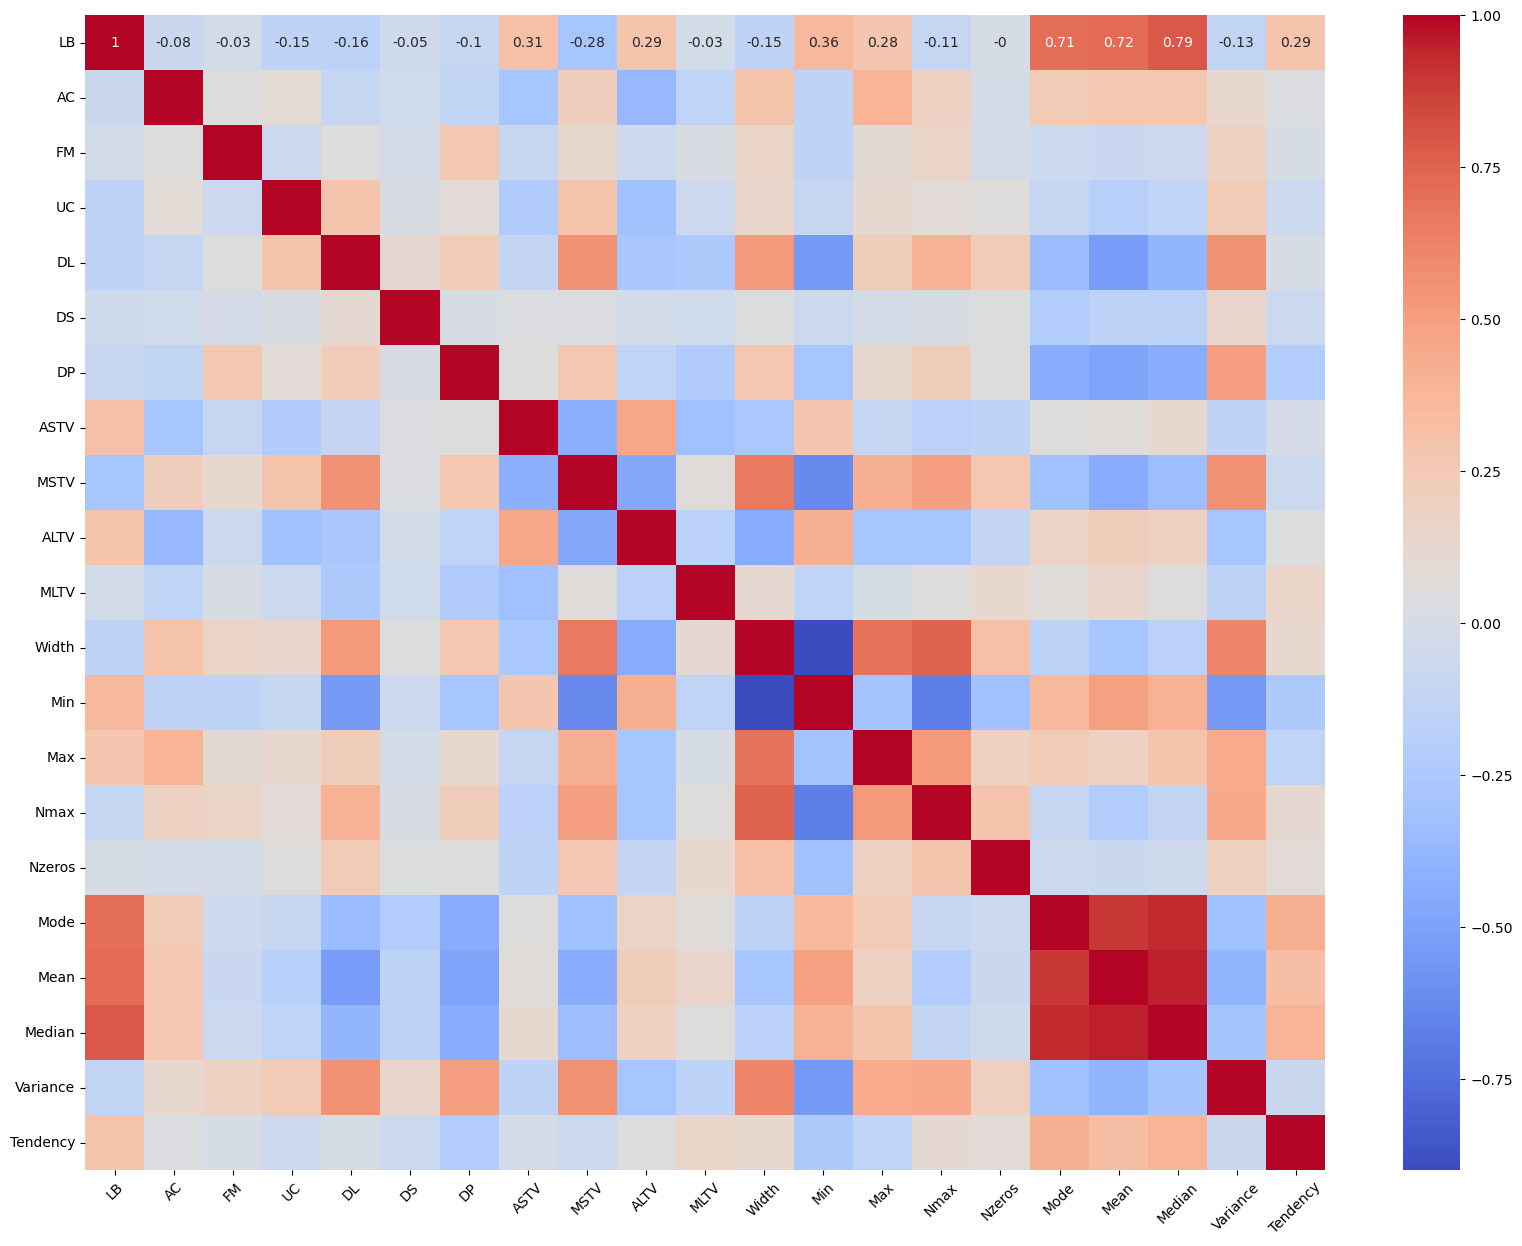

In [18]:
# Feature correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
corr = X.corr()
corr = corr.round(decimals=2)
#corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool_)) # make heatmap lower triangular (remove redundant info)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [19]:
corr

LB    AC    FM    UC    DL    DS    DP  ASTV  MSTV  ALTV  ...  \
LB        1.00 -0.08 -0.03 -0.15 -0.16 -0.05 -0.10  0.31 -0.28  0.29  ...   
AC       -0.08  1.00  0.05  0.09 -0.11 -0.04 -0.13 -0.28  0.21 -0.37  ...   
FM       -0.03  0.05  1.00 -0.07  0.05 -0.01  0.27 -0.10  0.12 -0.07  ...   
UC       -0.15  0.09 -0.07  1.00  0.29  0.01  0.08 -0.23  0.29 -0.31  ...   
DL       -0.16 -0.11  0.05  0.29  1.00  0.11  0.23 -0.12  0.56 -0.27  ...   
DS       -0.05 -0.04 -0.01  0.01  0.11  1.00  0.01  0.03  0.03 -0.03  ...   
DP       -0.10 -0.13  0.27  0.08  0.23  0.01  1.00  0.05  0.27 -0.14  ...   
ASTV      0.31 -0.28 -0.10 -0.23 -0.12  0.03  0.05  1.00 -0.43  0.46  ...   
MSTV     -0.28  0.21  0.12  0.29  0.56  0.03  0.27 -0.43  1.00 -0.47  ...   
ALTV      0.29 -0.37 -0.07 -0.31 -0.27 -0.03 -0.14  0.46 -0.47  1.00  ...   
MLTV     -0.03 -0.14  0.01 -0.07 -0.24 -0.04 -0.23 -0.32  0.07 -0.17  ...   
Width    -0.15  0.30  0.16  0.14  0.52  0.04  0.27 -0.26  0.66 -0.45  ...   
Min       0.36 -0.15 -0.15 -0.11 -0.55 -0.07 -0.28  0.28 -0.62  0.42  ...   
Max       0.28  0.39  0.10  0.12  0.22 -0.02  0.12 -0.11  0.41 -0.28  ...   
Nmax     -0.11  0.19  0.16  0.08  0.40  0.01  0.22 -0.17  0.50 -0.28  ...   
Nzeros   -0.00 -0.01 -0.02  0.06  0.24  0.04  0.06 -0.15  0.27 -0.12  ...   
Mode      0.71  0.24 -0.06 -0.10 -0.35 -0.22 -0.44  0.06 -0.31  0.17  ...   
Mean      0.72  0.27 -0.09 -0.19 -0.53 -0.16 -0.49  0.07 -0.45  0.22  ...   
Median    0.79  0.27 -0.07 -0.14 -0.39 -0.16 -0.44  0.12 -0.34  0.19  ...   
Variance -0.13  0.13  0.18  0.24  0.56  0.14  0.50 -0.15  0.56 -0.28  ...   
Tendency  0.29  0.03 -0.00 -0.07  0.00 -0.07 -0.22 -0.01 -0.07  0.04  ...   

          Width   Min   Max  Nmax  Nzeros  Mode  Mean  Median  Variance  \
LB        -0.15  0.36  0.28 -0.11   -0.00  0.71  0.72    0.79     -0.13   
AC         0.30 -0.15  0.39  0.19   -0.01  0.24  0.27    0.27      0.13   
FM         0.16 -0.15  0.10  0.16   -0.02 -0.06 -0.09   -0.07      0.18   
UC         0.14 -0.11  0.12  0.08    0.06 -0.10 -0.19   -0.14      0.24   
DL         0.52 -0.55  0.22  0.40    0.24 -0.35 -0.53   -0.39      0.56   
DS         0.04 -0.07 -0.02  0.01    0.04 -0.22 -0.16   -0.16      0.14   
DP         0.27 -0.28  0.12  0.22    0.06 -0.44 -0.49   -0.44      0.50   
ASTV      -0.26  0.28 -0.11 -0.17   -0.15  0.06  0.07    0.12     -0.15   
MSTV       0.66 -0.62  0.41  0.50    0.27 -0.31 -0.45   -0.34      0.56   
ALTV      -0.45  0.42 -0.28 -0.28   -0.12  0.17  0.22    0.19     -0.28   
MLTV       0.11 -0.14  0.00  0.06    0.12  0.07  0.14    0.06     -0.16   
Width      1.00 -0.90  0.69  0.75    0.32 -0.16 -0.28   -0.17      0.62   
Min       -0.90  1.00 -0.30 -0.67   -0.31  0.35  0.49    0.40     -0.55   
Max        0.69 -0.30  1.00  0.52    0.18  0.24  0.19    0.29      0.44   
Nmax       0.75 -0.67  0.52  1.00    0.29 -0.10 -0.22   -0.12      0.45   
Nzeros     0.32 -0.31  0.18  0.29    1.00 -0.06 -0.08   -0.05      0.20   
Mode      -0.16  0.35  0.24 -0.10   -0.06  1.00  0.89    0.93     -0.31   
Mean      -0.28  0.49  0.19 -0.22   -0.08  0.89  1.00    0.95     -0.40   
Median    -0.17  0.40  0.29 -0.12   -0.05  0.93  0.95    1.00     -0.29   
Variance   0.62 -0.55  0.44  0.45    0.20 -0.31 -0.40   -0.29      1.00   
Tendency   0.12 -0.24 -0.14  0.11    0.08  0.42  0.33    0.39     -0.08   

          Tendency  
LB            0.29  
AC            0.03  
FM           -0.00  
UC           -0.07  
DL            0.00  
DS           -0.07  
DP           -0.22  
ASTV         -0.01  
MSTV         -0.07  
ALTV          0.04  
MLTV          0.15  
Width         0.12  
Min          -0.24  
Max          -0.14  
Nmax          0.11  
Nzeros        0.08  
Mode          0.42  
Mean          0.33  
Median        0.39  
Variance     -0.08  
Tendency      1.00  

[21 rows x 21 columns]

In [20]:
# check again the number of missing values in each column
X.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
dtype: int64

## Réduire la dimension

### Supprimer les variables fortement similaires

In [21]:
X = X.drop('Mode',axis=1)
X = X.drop('Median',axis=1)
X

LB     AC     FM     UC     DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
0     120  0.000  0.000  0.000  0.000  0.0  0.0    73   0.5    43   2.4   
1     132  0.006  0.000  0.006  0.003  0.0  0.0    17   2.1     0  10.4   
2     133  0.003  0.000  0.008  0.003  0.0  0.0    16   2.1     0  13.4   
3     134  0.003  0.000  0.008  0.003  0.0  0.0    16   2.4     0  23.0   
4     132  0.007  0.000  0.008  0.000  0.0  0.0    16   2.4     0  19.9   
...   ...    ...    ...    ...    ...  ...  ...   ...   ...   ...   ...   
2121  140  0.000  0.000  0.007  0.000  0.0  0.0    79   0.2    25   7.2   
2122  140  0.001  0.000  0.007  0.000  0.0  0.0    78   0.4    22   7.1   
2123  140  0.001  0.000  0.007  0.000  0.0  0.0    79   0.4    20   6.1   
2124  140  0.001  0.000  0.006  0.000  0.0  0.0    78   0.4    27   7.0   
2125  142  0.002  0.002  0.008  0.000  0.0  0.0    74   0.4    36   5.0   

      Width  Min  Max  Nmax  Nzeros  Mean  Variance  Tendency  
0        64   62  126     2       0   137        73         1  
1       130   68  198     6       1   136        12         0  
2       130   68  198     5       1   135        13         0  
3       117   53  170    11       0   134        13         1  
4       117   53  170     9       0   136        11         1  
...     ...  ...  ...   ...     ...   ...       ...       ...  
2121     40  137  177     4       0   150         2         0  
2122     66  103  169     6       0   148         3         1  
2123     67  103  170     5       0   148         4         1  
2124     66  103  169     6       0   147         4         1  
2125     42  117  159     2       1   143         1         0  

[2126 rows x 19 columns]

# PARTIE 2 : Clusterings avant l'ACP

## K-means

### Avec 10 clusters (CLASS)

In [22]:
# Fit the KMeans model to the data
n_clusters_CLASS = 10
kmeans_CLASS = KMeans(n_clusters=n_clusters_CLASS)

kmeans_CLASS.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.22897445372173725
Davies-Bouldin Index: 1.3126761993257718


### Avec 3 clusters (NSP)

In [23]:
# Fit the KMeans model to the data
n_clusters_NSP = 3
kmeans_NSP = KMeans(n_clusters=n_clusters_NSP)

kmeans_NSP.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.3087475118474244
Davies-Bouldin Index: 1.234360063883755


### Avec 2 clusters (Normal / Unormal)

In [24]:
# Fit the KMeans model to the data
n_clusters_NSP = 2
kmeans_2 = KMeans(n_clusters=n_clusters_NSP)

kmeans_2.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_2.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_2.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.4043376867139624
Davies-Bouldin Index: 0.972129756184984


### Avec 16 clusters (combinaison)

In [25]:
# Fit the KMeans model to the data
n_clusters_CLASS = 16
kmeans_SUM = KMeans(n_clusters=n_clusters_CLASS)

kmeans_SUM.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_SUM.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_SUM.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.19746418547092126
Davies-Bouldin Index: 1.3546670975081148


**Note: AVEC 2 clusters (Normal / Unormal) on a les meuilleurs resultats**

## Kmeans++

### Avec 10 clusters (CLASS)

In [26]:
kmeanspp_CLASS = KMeans(n_clusters=10, init='k-means++')
kmeanspp_CLASS.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.20531747642225218
Davies-Bouldin Index: 1.3921174914810903


### Avec 3 clusters (NSP)

In [27]:
# Fit the KMeans model to the data
n_clusters_NSP = 3

kmeanspp_NSP = KMeans(n_clusters=3, init='k-means++')

kmeanspp_NSP.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.3087475118474244
Davies-Bouldin Index: 1.234360063883755


### Avec 2 clusters (Normal / Unormal)

In [28]:
# Fit the KMeans model to the data
n_clusters_NSP = 2
kmeanspp_2 = KMeans(n_clusters=n_clusters_NSP, init='k-means++')

kmeanspp_2.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_2.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_2.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.4043376867139624
Davies-Bouldin Index: 0.972129756184984


### Avec 16 clusters (combinaison)

In [29]:
# Fit the KMeans model to the data
n_clusters_CLASS = 16
kmeans_SUM = KMeans(n_clusters=n_clusters_CLASS,init='k-means++')

kmeans_SUM.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_SUM.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_SUM.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.2180693758627542
Davies-Bouldin Index: 1.2740319579125599


## Mini-batch Kmeans

### Avec 10 clusters (CLASS)

In [30]:
mini_batch_kmeans_CLASS = MiniBatchKMeans(n_clusters=10, batch_size=50)
mini_batch_kmeans_CLASS.fit(X)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.21695488451384307
Davies-Bouldin Index: 1.413711136730328


### Avec 3 clusters (NSP)

In [31]:
mini_batch_kmeans_NSP = MiniBatchKMeans(n_clusters=3, batch_size=50)
mini_batch_kmeans_NSP.fit(X)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.30955430499727304
Davies-Bouldin Index: 1.2419382324943846


### Avec 2 clusters (Normal / Unormal)

In [32]:
# Fit the KMeans model to the data
n_clusters_NSP = 2
kmeans_2 = MiniBatchKMeans(n_clusters=2, batch_size=50)

kmeans_2.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_2.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_2.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.4044024628839433
Davies-Bouldin Index: 0.9723277176105375


### Avec 16 class (combinaison)

In [33]:
# Fit the KMeans model to the data
n_clusters_CLASS = 16
kmeans_SUM = MiniBatchKMeans(n_clusters=16, batch_size=50)

kmeans_SUM.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_SUM.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_SUM.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.20497616173399866
Davies-Bouldin Index: 1.408811102343697


**Note: le mini batch Kmeans avec 2 clusters a les meuilleurs resultats**

# Partie 3 : ACP

In [34]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [35]:
n_components = 3  # Choisissez le nombre de dimensions à conserver (2 ou 3 pour visualisation)
pca = PCA(n_components=n_components)
pca.fit(X_standardized)
pca_components = pca.fit_transform(X_standardized)

In [36]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.47850614 2.329747   1.79832001]
[0.2882068  0.12256059 0.0946039 ]


In [37]:
eigenvectors = pca.components_  # Chaque ligne correspond à une composante principale
explained_variance = pca.explained_variance_ratio_  # Variance expliquée par chaque composante

# Créer un DataFrame pour les vecteurs propres pour une meilleure visualisation
eigenvectors_df = pd.DataFrame(eigenvectors, 
                               columns=X.columns, 
                               index=[f'PC{i+1}' for i in range(len(eigenvectors))])

# Extraire la contribution des variables à la première dimension
# Les contributions sont données par le carré des coefficients des variables dans les vecteurs propres
contributions_first_dimension = eigenvectors_df.iloc[0]**2

In [38]:
# Afficher les résultats
print("Vecteurs propres (composantes principales) :")
print(eigenvectors_df)
print("\nContribution des variables à la première dimension :")
print(contributions_first_dimension)
print("\nVariance expliquée par chaque composante :")
print(explained_variance)

Vecteurs propres (composantes principales) :
           LB        AC        FM        UC        DL        DS        DP  \
PC1 -0.156594  0.107082  0.091253  0.138451  0.289604  0.040166  0.180121   
PC2 -0.356619 -0.329353  0.009149  0.064736  0.166964  0.126465  0.282293   
PC3  0.425116 -0.134402  0.102887 -0.164340  0.156835  0.044683  0.279315   

         ASTV      MSTV      ALTV      MLTV     Width       Min       Max  \
PC1 -0.173382  0.350792 -0.250449  0.008254  0.380272 -0.365252  0.223850   
PC2  0.133324 -0.006606  0.096285 -0.221167 -0.191129  0.038604 -0.351335   
PC3  0.486176 -0.087999  0.323494 -0.378490  0.104581  0.017744  0.256268   

         Nmax    Nzeros      Mean  Variance  Tendency  
PC1  0.307894  0.152131 -0.233216  0.319232 -0.017685  
PC2 -0.164830 -0.108800 -0.512773  0.076813 -0.302013  
PC3  0.148186  0.025589  0.088320  0.241692  0.035211  

Contribution des variables à la première dimension :
LB          0.024522
AC          0.011467
FM          0.008

In [39]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(n_components)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            5.478506                  29.0                   29.0
1      Dim2            2.329747                  12.0                   41.0
2      Dim3            1.798320                   9.0                   51.0

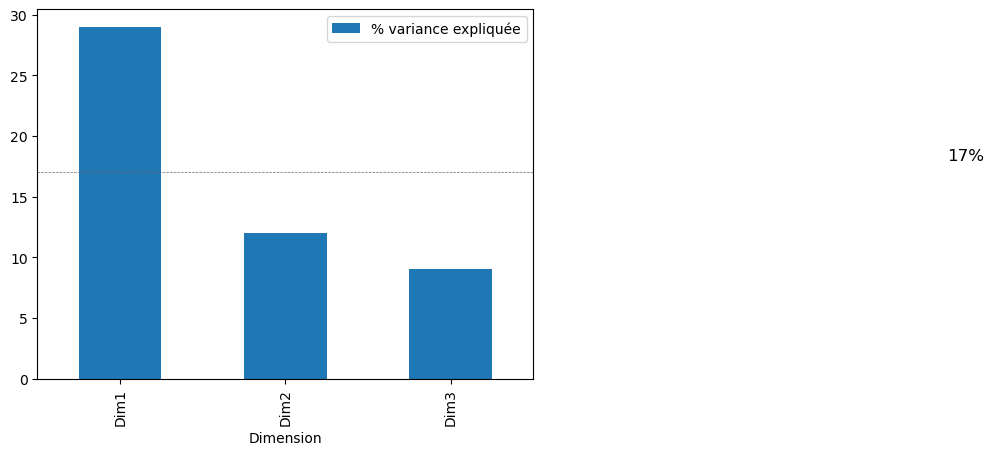

In [40]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [41]:
data_pca = pca.transform(X)

/Users/grace.sheen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [42]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1],
    "Dim3" : data_pca[:,2],
})

# Résultat (premières lignes)
data_pca_df.head()

Dim1        Dim2        Dim3
0 -20.173889 -148.836645  169.620666
1  20.240463 -208.821435  141.627633
2  20.526523 -209.219345  140.436363
3  16.732614 -200.627567  129.210777
4  15.299088 -200.080044  128.929741

## Visualitation of clusters on 2D / 3D

### Avec 10 clusters (CLASS)

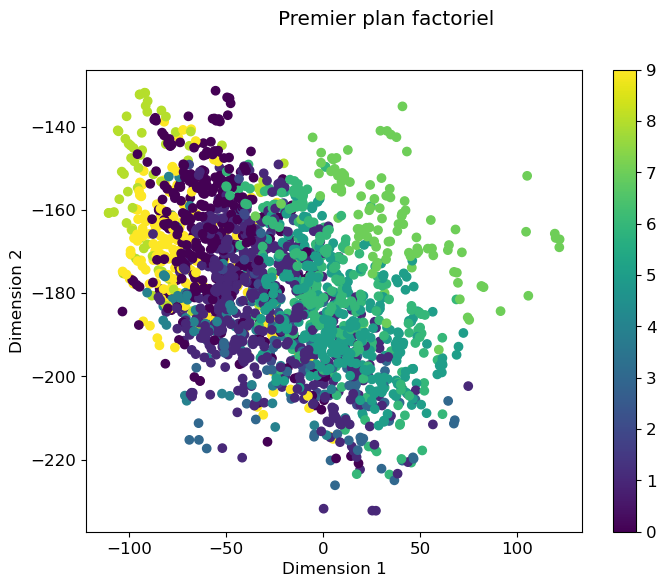

In [43]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], c=y['CLASS'], cmap='viridis')

plt.xlabel("Dimension 1")  # Nom de l'axe X
plt.ylabel("Dimension 2")  # Nom de l'axe Y
plt.suptitle("Premier plan factoriel")  # Titre général
plt.colorbar(scatter)  # Barre de couleurs pour la légende des classes
plt.show()

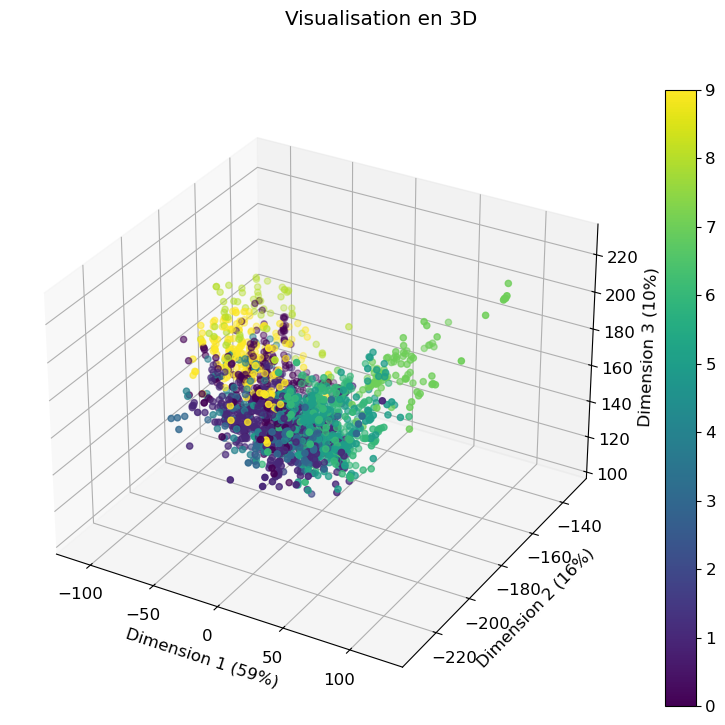

In [44]:
# Plot en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utilisation de la troisième dimension 'Dim3' dans la visualisation
scatter = ax.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], data_pca_df['Dim3'], 
                     c=y['CLASS'], cmap='viridis')

# Ajouter les labels aux axes
ax.set_xlabel("Dimension 1 (59%)")
ax.set_ylabel("Dimension 2 (16%)")
ax.set_zlabel("Dimension 3 (10%)")  # Modifier selon la variance expliquée par Dim3
plt.suptitle("Visualisation en 3D")  # Titre général avec variance cumulée

# Ajouter la légende de couleurs pour les classes
plt.colorbar(scatter)

# Afficher le graphique
plt.show()

### Avec 3 clusters (NSP)

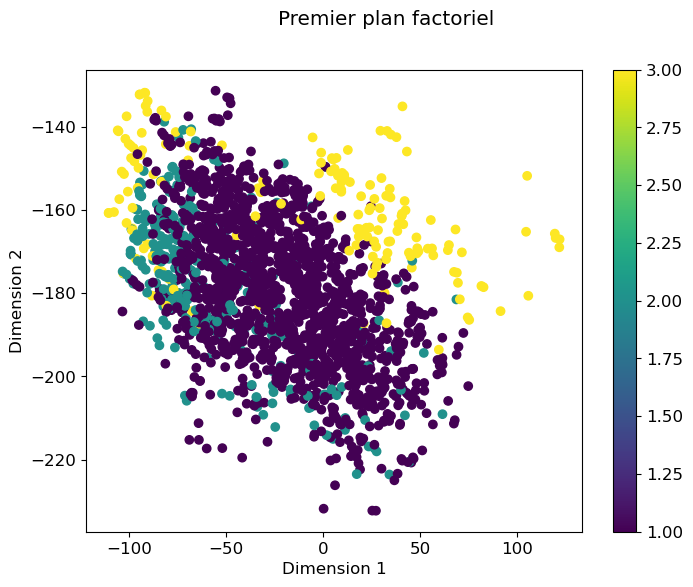

In [45]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], c=y['NSP'], cmap='viridis')

plt.xlabel("Dimension 1")  # Nom de l'axe X
plt.ylabel("Dimension 2")  # Nom de l'axe Y
plt.suptitle("Premier plan factoriel")  # Titre général
plt.colorbar(scatter)  # Barre de couleurs pour la légende des classes
plt.show()

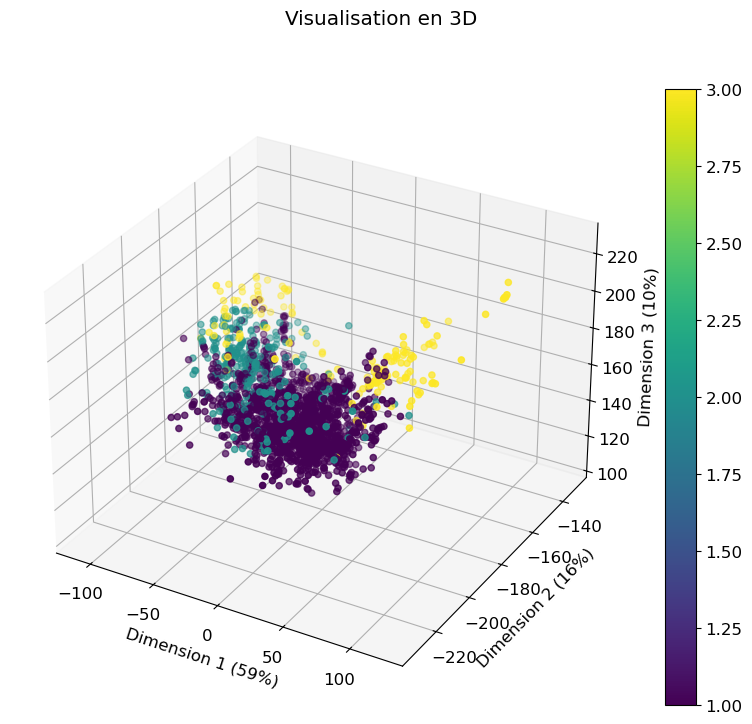

In [46]:
# Plot en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utilisation de la troisième dimension 'Dim3' dans la visualisation
scatter = ax.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], data_pca_df['Dim3'], 
                     c=y['NSP'], cmap='viridis')

# Ajouter les labels aux axes
ax.set_xlabel("Dimension 1 (59%)")
ax.set_ylabel("Dimension 2 (16%)")
ax.set_zlabel("Dimension 3 (10%)")  # Modifier selon la variance expliquée par Dim3
plt.suptitle("Visualisation en 3D")  # Titre général avec variance cumulée

# Ajouter la légende de couleurs pour les classes
plt.colorbar(scatter)

# Afficher le graphique
plt.show()

### Avec 2 clusters (Normal / Unormal)

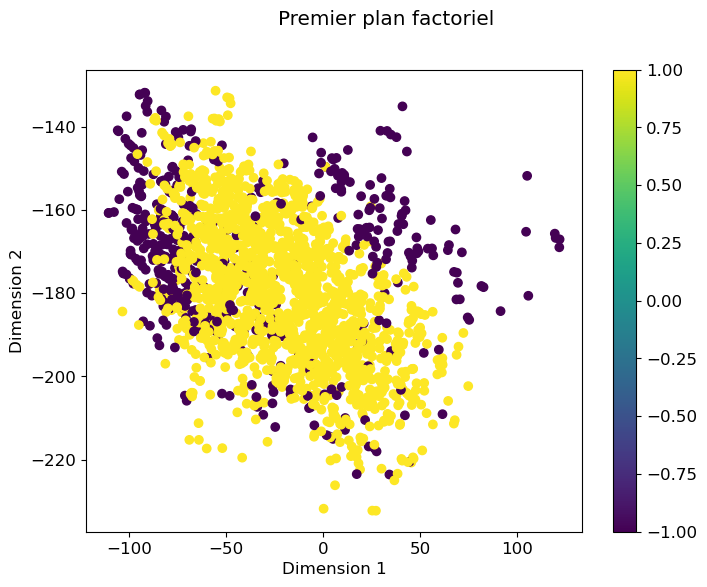

In [47]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], c=y['status'], cmap='viridis')

plt.xlabel("Dimension 1")  # Nom de l'axe X
plt.ylabel("Dimension 2")  # Nom de l'axe Y
plt.suptitle("Premier plan factoriel")  # Titre général
plt.colorbar(scatter)  # Barre de couleurs pour la légende des classes
plt.show()

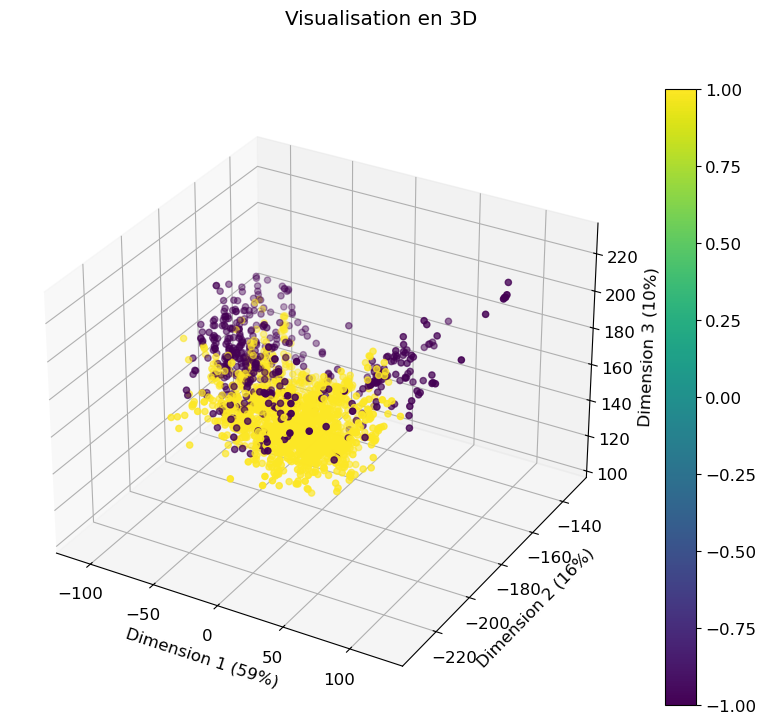

In [48]:
# Plot en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utilisation de la troisième dimension 'Dim3' dans la visualisation
scatter = ax.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], data_pca_df['Dim3'], 
                     c=y['status'], cmap='viridis')

# Ajouter les labels aux axes
ax.set_xlabel("Dimension 1 (59%)")
ax.set_ylabel("Dimension 2 (16%)")
ax.set_zlabel("Dimension 3 (10%)")  # Modifier selon la variance expliquée par Dim3
plt.suptitle("Visualisation en 3D")  # Titre général avec variance cumulée

# Ajouter la légende de couleurs pour les classes
plt.colorbar(scatter)

# Afficher le graphique
plt.show()

### Avec 16 class (combinaison)

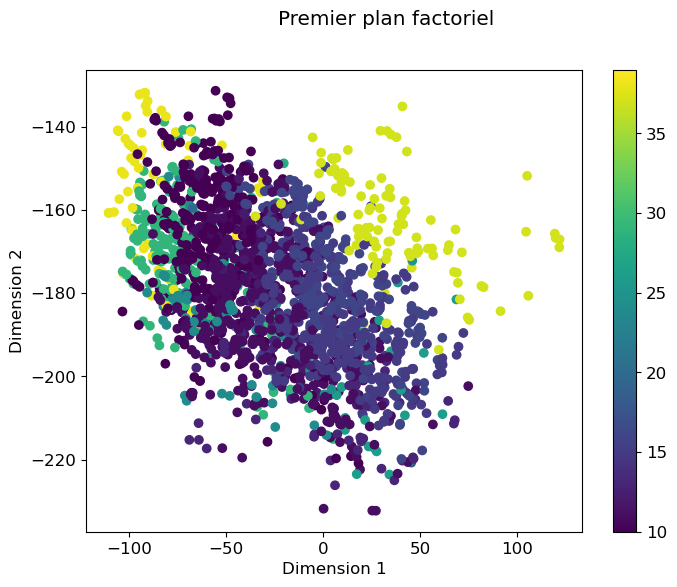

In [49]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], c=y['sum'], cmap='viridis')

plt.xlabel("Dimension 1")  # Nom de l'axe X
plt.ylabel("Dimension 2")  # Nom de l'axe Y
plt.suptitle("Premier plan factoriel")  # Titre général
plt.colorbar(scatter)  # Barre de couleurs pour la légende des classes
plt.show()

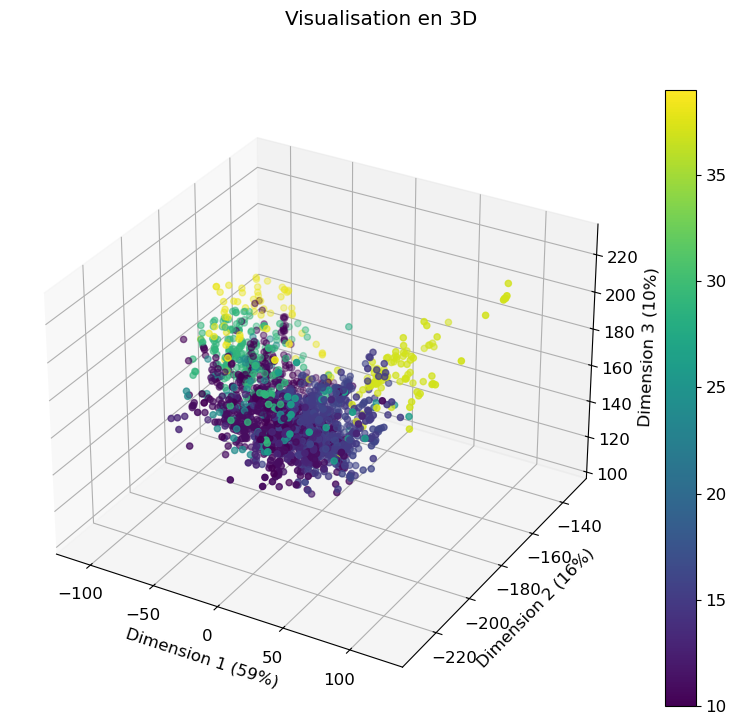

In [50]:
# Plot en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utilisation de la troisième dimension 'Dim3' dans la visualisation
scatter = ax.scatter(data_pca_df['Dim1'], data_pca_df['Dim2'], data_pca_df['Dim3'], 
                     c=y['sum'], cmap='viridis')

# Ajouter les labels aux axes
ax.set_xlabel("Dimension 1 (59%)")
ax.set_ylabel("Dimension 2 (16%)")
ax.set_zlabel("Dimension 3 (10%)")  # Modifier selon la variance expliquée par Dim3
plt.suptitle("Visualisation en 3D")  # Titre général avec variance cumulée

# Ajouter la légende de couleurs pour les classes
plt.colorbar(scatter)

# Afficher le graphique
plt.show()

# Partie 4 : Clustering après l'ACP

## K-means

### Avec 10 clusters (CLASS)

In [51]:
n_clusters_CLASS = 10  # Choisissez le nombre de clusters
kmeans_CLASS = KMeans(n_clusters=n_clusters_CLASS)
clusters_CLASS = kmeans_CLASS.fit_predict(pca_components) ##modifier the input

# Ajouter les clusters au DataFrame pour la visualisation
data_pca_df_CLASS = pd.DataFrame(data=pca_components, columns=[f'Dim{i+1}' for i in range(n_components)])
data_pca_df_CLASS['Cluster'] = clusters_CLASS

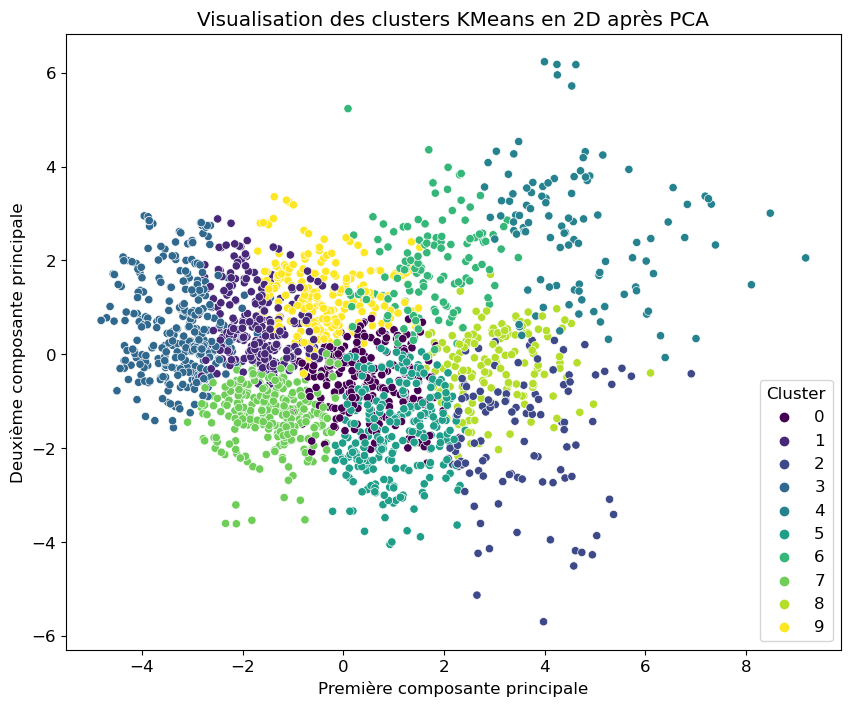

In [52]:
# Visualiser les clusters en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=data_pca_df_CLASS, legend='full')
plt.title('Visualisation des clusters KMeans en 2D après PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Cluster', loc='best')
plt.show()

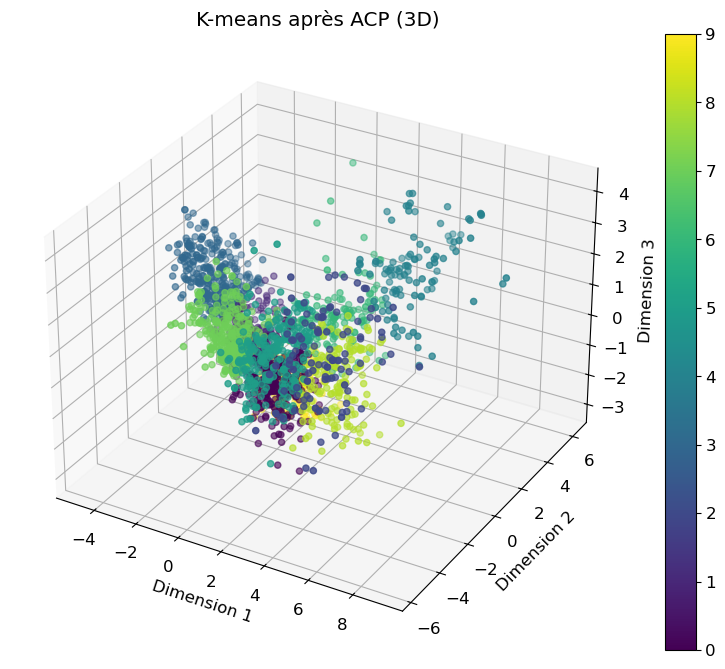

In [53]:
# Visualiser les clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_df_CLASS['Dim1'], data_pca_df_CLASS['Dim2'], data_pca_df_CLASS['Dim3'], 
                         c=data_pca_df_CLASS['Cluster'], cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means après ACP (3D)')
plt.colorbar(scatter)
plt.show()

In [54]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.09382181140758249
Davies-Bouldin Index: 1.8063448403454274


### Avec 3 clusters (NSP)

In [55]:
n_clusters_NSP = 3  # Choisissez le nombre de clusters
kmeans_NSP = KMeans(n_clusters=n_clusters_NSP)
clusters_NSP = kmeans_NSP.fit_predict(pca_components)

# Ajouter les clusters au DataFrame pour la visualisation
data_pca_df_NSP = pd.DataFrame(data=pca_components, columns=[f'Dim{i+1}' for i in range(n_components)])
data_pca_df_NSP['Cluster'] = clusters_NSP

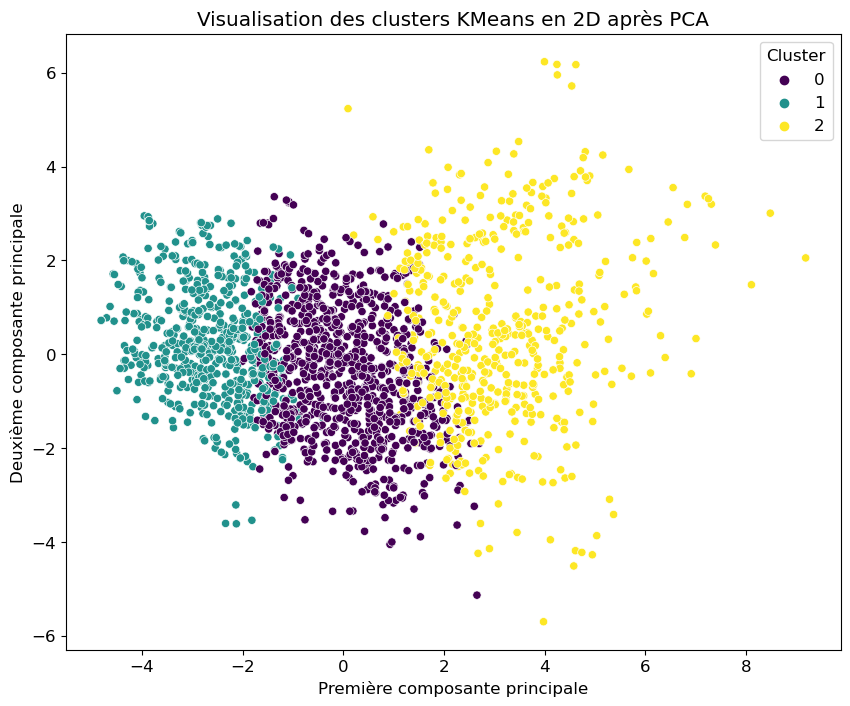

In [56]:
# Visualiser les clusters en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=data_pca_df_NSP, legend='full')
plt.title('Visualisation des clusters KMeans en 2D après PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Cluster', loc='best')
plt.show()

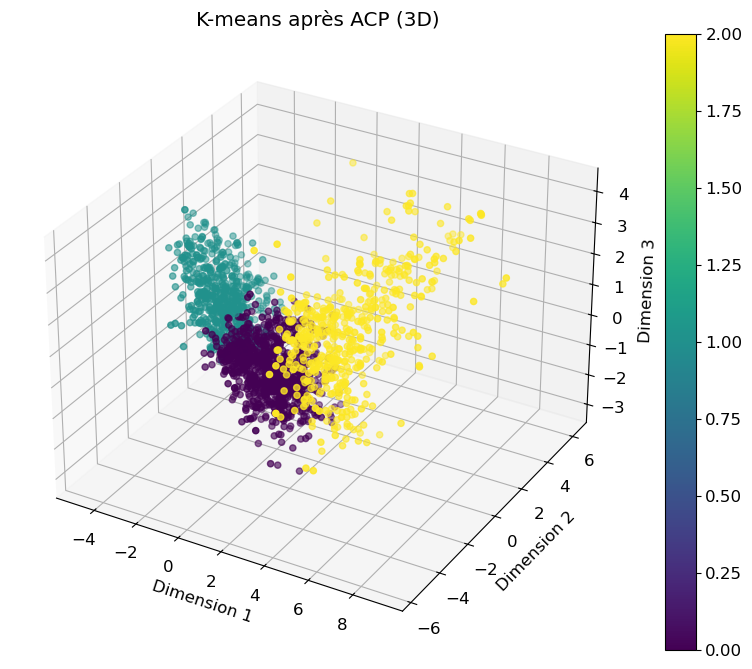

In [57]:
# Visualiser les clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_df_CLASS['Dim1'], data_pca_df_CLASS['Dim2'], data_pca_df_CLASS['Dim3'], 
                         c=data_pca_df_NSP['Cluster'], cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means après ACP (3D)')
plt.colorbar(scatter)
plt.show()

In [58]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.20154621329768435
Davies-Bouldin Index: 1.3379316255071088


### Avec 2 clusters (Normal / Unormal)

In [59]:
n_clusters_status = 2 # Choisissez le nombre de clusters
kmeans_status = KMeans(n_clusters=2)
clusters_status = kmeans_status.fit_predict(pca_components)

# Ajouter les clusters au DataFrame pour la visualisation
data_pca_df_status = pd.DataFrame(data=pca_components, columns=[f'Dim{i+1}' for i in range(n_components)])
data_pca_df_status['Cluster'] = clusters_status

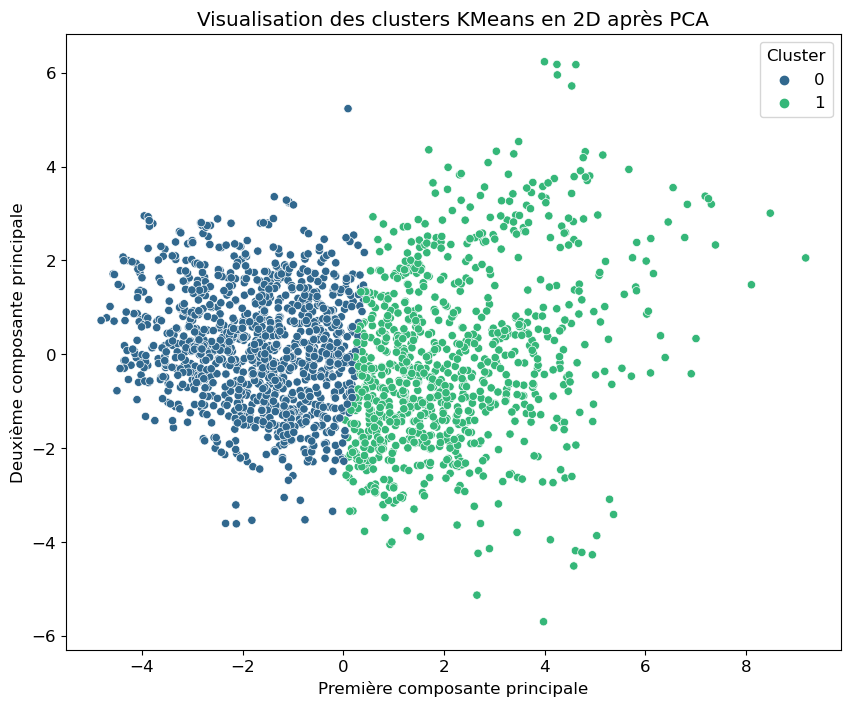

In [60]:
# Visualiser les clusters en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=data_pca_df_status, legend='full')
plt.title('Visualisation des clusters KMeans en 2D après PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Cluster', loc='best')
plt.show()

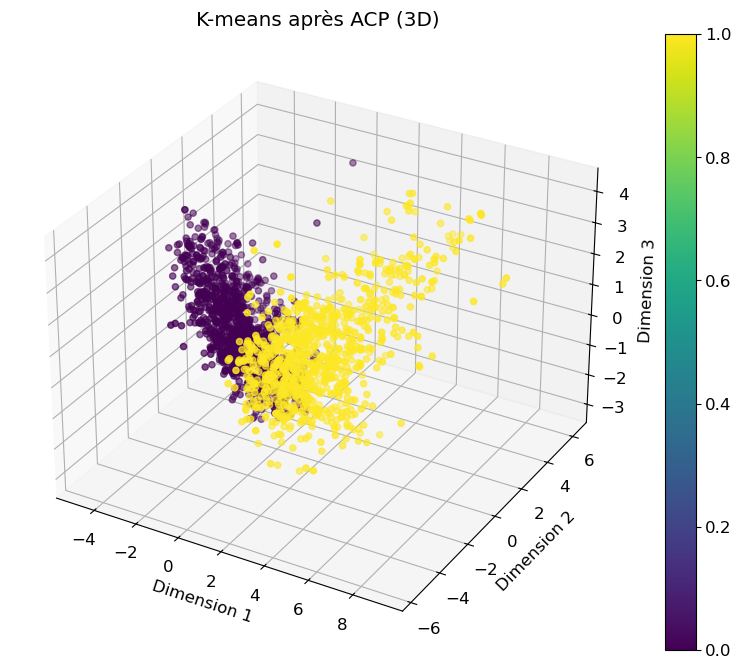

In [61]:
# Visualiser les clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_df_CLASS['Dim1'], data_pca_df_CLASS['Dim2'], data_pca_df_CLASS['Dim3'], 
                         c=data_pca_df_status['Cluster'], cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means après ACP (3D)')
plt.colorbar(scatter)
plt.show()

In [62]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_status.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_status.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.3578214538635364
Davies-Bouldin Index: 1.0579742021812677


### Avec 16 class (combinaison)

In [63]:
n_clusters_sum = 16  # Choisissez le nombre de clusters
kmeans_sum = KMeans(n_clusters=16)
clusters_sum = kmeans_sum.fit_predict(pca_components)

# Ajouter les clusters au DataFrame pour la visualisation
data_pca_df_sum = pd.DataFrame(data=pca_components, columns=[f'Dim{i+1}' for i in range(n_components)])
data_pca_df_sum['Cluster'] = clusters_sum

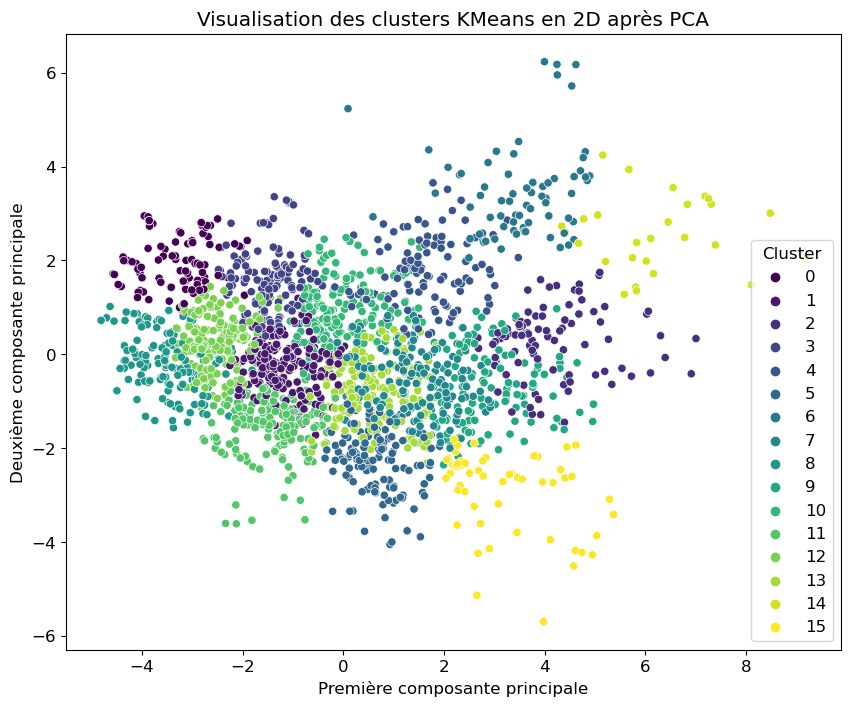

In [64]:
# Visualiser les clusters en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=data_pca_df_sum, legend='full')
plt.title('Visualisation des clusters KMeans en 2D après PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Cluster', loc='best')
plt.show()

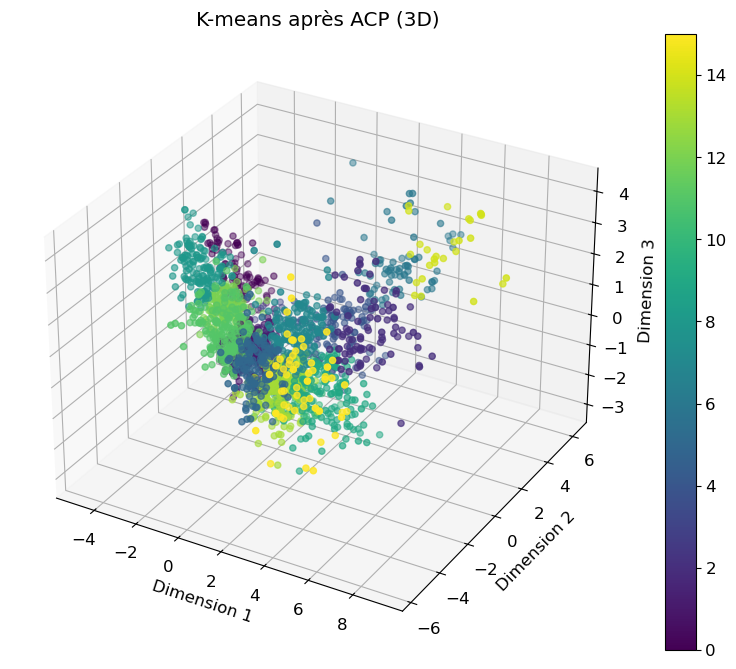

In [65]:
# Visualiser les clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_df_CLASS['Dim1'], data_pca_df_CLASS['Dim2'], data_pca_df_CLASS['Dim3'], 
                         c=data_pca_df_sum['Cluster'], cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means après ACP (3D)')
plt.colorbar(scatter)
plt.show()

In [66]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans_sum.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeans_sum.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.06015579371015532
Davies-Bouldin Index: 2.016850803070617


## Kmeans++

### Avec 10 clusters (CLASS)

In [67]:
kmeanspp_CLASS = KMeans(n_clusters=10, init='k-means++')
kmeanspp_CLASS.fit(pca_components)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.09796369756721912


In [68]:
# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Davies-Bouldin Index: 2.117023914305934


### Avec 3 clusters (NSP)

In [69]:
# Fit the KMeans model to the data
n_clusters_NSP = 3

kmeanspp_NSP = KMeans(n_clusters=3, init='k-means++')

kmeanspp_NSP.fit(pca_components)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.20190937238615844
Davies-Bouldin Index: 1.335394320727417


### Avec 2 clusters (Normal / Unormal)

In [70]:
# Fit the KMeans model to the data
n_clusters_status = 2

kmeanspp_status = KMeans(n_clusters=2, init='k-means++')

kmeanspp_status.fit(pca_components)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_status.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_status.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.3581112521425544
Davies-Bouldin Index: 1.0573978806593216


### Avec 16 class (combinaison)

In [71]:
# Fit the KMeans model to the data
n_clusters_NSP = 16

kmeanspp_sum = KMeans(n_clusters=16, init='k-means++')

kmeanspp_sum.fit(pca_components)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeanspp_sum.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, kmeanspp_sum.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.06010041298209038
Davies-Bouldin Index: 2.2364067139598296


## Mini-batch Kmeans

### Avec 10 clusters (CLASS)

In [72]:
mini_batch_kmeans_CLASS = MiniBatchKMeans(n_clusters=10, batch_size=50)
mini_batch_kmeans_CLASS.fit(pca_components)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_CLASS.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_CLASS.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.07720253744054487
Davies-Bouldin Index: 1.9784394901442817


### Avec 3 clusters (NSP)

In [73]:
mini_batch_kmeans_NSP = MiniBatchKMeans(n_clusters=3, batch_size=50)
mini_batch_kmeans_NSP.fit(pca_components)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_NSP.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_NSP.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.19830223486124443
Davies-Bouldin Index: 1.354946907241304


### Avec 2 clusters (Normal / Unormal)

In [74]:
mini_batch_kmeans_status = MiniBatchKMeans(n_clusters=2, batch_size=50)
mini_batch_kmeans_status.fit(pca_components)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_status.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_status.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.3606577038550948
Davies-Bouldin Index: 1.0534215543596224


### Avec 16 class (combinaison)

In [75]:
mini_batch_kmeans_sum = MiniBatchKMeans(n_clusters=16, batch_size=50)
mini_batch_kmeans_sum.fit(pca_components)
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, mini_batch_kmeans_sum.labels_)
print(f"Silhouette Score: {silhouette_avg}")

#The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1:

#+1: Perfectly clustered, with points very far from neighboring clusters.
#0: Clusters are overlapping or poorly separated.
#-1: Poor clustering, as points may have been assigned to the wrong cluster.


# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X, mini_batch_kmeans_sum.labels_)
print(f"Davies-Bouldin Index: {db_score}")

##The Davies-Bouldin Index measures the ratio of within-cluster distances to between-cluster distances. 
##A lower value indicates better clustering.

Silhouette Score: 0.049313944663645984
Davies-Bouldin Index: 2.3014777888205424
